In [1]:
import numpy as np
from numpy import random
import math
import nest
import nest.raster_plot
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from sympy.solvers import solve
from sympy import Symbol
from matplotlib import rcParams 


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:57

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Variables
tone = 100
angle = 0
max_ild = 2
time_sim = 100

# Variables dependant on tone
x = [100,1000, 10000]
y = [10, 10, 0.1]
p = np.polyfit(x, np.log(y), 1)
a = np.exp(p[1])
b = p[0]
C_m_bushy = a * np.exp(b * tone)
print("Tone:", tone)
print("C_m:", C_m_bushy)

# Fixed
w_head = 22 #cm
v_sound = 33000 #cm/s

ANFs2SBCs_weight = 2.0
ANFs2GBCs_weight = 1.0
GBCs2MNTBCs_weight = 16.0
SBCs2LSO_weight = 16.0
MNTBCs2LSO_weight = -2.0
#SBCs2MSO_weight = 4.0
#MNTBCs2MSO_weights = [0, -2.0, -4.0, -6.0, -8.0, -10.0, -12.0, -14.0, -16.0, -20.0]

mean_rate = 0
mean_amplitude = 1000
noise_rate = 20

n_ANFs = 35000
ANFs2SBCs = 4
ANFs2GBCs = 20
SBCs2LSO = int(ANFs2GBCs/ANFs2SBCs)
n_SBCs = int(n_ANFs/ANFs2SBCs)
n_GBCs = int(n_ANFs/ANFs2GBCs)

freq = np.round(np.logspace(np.log(20),np.log(20000), num = 3500, base = np.exp(1)),2)
channel_x = np.where(freq>=tone)[0][0]
spectro = np.zeros((3500,time_sim))
amplitudes = np.round(stats.norm.pdf(np.linspace(-1, 1, 21) , 0, 1.0/(math.sqrt(2*math.pi)*1)),2)

if(channel_x<10):
    spectro[channel_x:channel_x+10+1,:] = amplitudes[10:].reshape(11,1)*np.ones((11, time_sim))
    spectro[0:channel_x+1, :] = amplitudes[10-channel_x:11].reshape(channel_x+1,1)*np.ones((channel_x+1, time_sim))
else:
    if(channel_x>3489):
        spectro[channel_x-10:channel_x+1] = amplitudes[:11].reshape(11,1)*np.ones((11, time_sim))
        spectro[channel_x:] = amplitudes[10:10+3500-channel_x].reshape(3500-channel_x,1)*np.ones((3500-channel_x, time_sim))
    else:
        spectro[channel_x - 10 : channel_x + 10 + 1, :] = amplitudes.reshape(21,1)*np.ones((21, time_sim))

Tone: 100
C_m: 12.305240043592631


Text(0.5, 0, 'Frequency [Hz]')

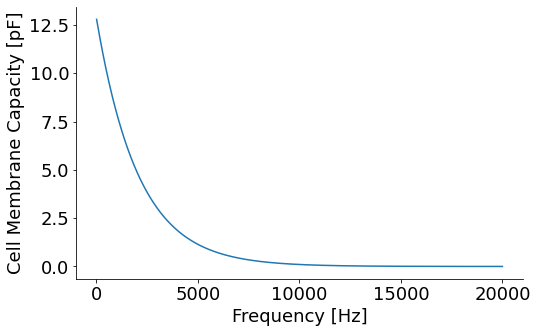

In [3]:
text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=16)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels 
plt.rc('legend', fontsize=16)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title
fig, axs = plt.subplots(1, figsize=(8,5))
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.plot(freq, a * np.exp(b * freq))
axs.set_ylabel("Cell Membrane Capacity [pF]")
axs.set_xlabel("Frequency [Hz]")

Text(0.5, 0, 'Channel Value [Hz]')

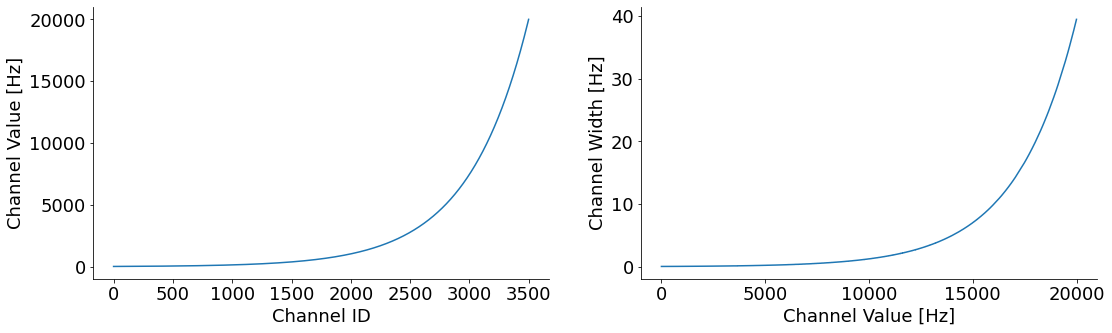

In [4]:
text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=16)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels 
plt.rc('legend', fontsize=16)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title
fig, axs = plt.subplots(1,2, figsize=(18,5))
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].plot(np.arange(0,3500), freq)
axs[0].set_ylabel("Channel Value [Hz]")
axs[0].set_xlabel("Channel ID")

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].plot(np.linspace(20,20000,3500)[:-1], np.diff(freq))
axs[1].set_ylabel("Channel Width [Hz]")
axs[1].set_xlabel("Channel Value [Hz]")

In [5]:
print("Angle:", angle)
delta_x = (w_head*np.sin(np.deg2rad(angle)))
itd = 1000*delta_x/v_sound #ms
ipds = 2*np.pi*itd*freq/1000
ild = angle*max_ild/90
print("ITD:", itd)
print("ILD:", ild)

Angle: 0
ITD: 0.0
ILD: 0.0


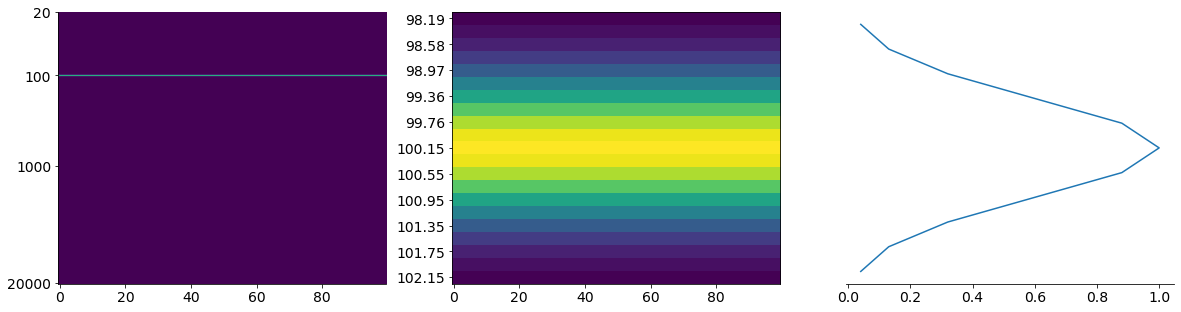

In [6]:
text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=16)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels 
plt.rc('legend', fontsize=16)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title

fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].imshow(spectro, aspect = 'auto')
axs[0].set_yticks([0, np.where(freq>=100)[0][0], np.where(freq>=1000)[0][0], np.where(freq==20000)[0][0]-10])
axs[0].set_yticklabels([20,100,1000,20000])


if(channel_x<10):
    axs[1].imshow(spectro[channel_x: channel_x + 20 + 1, :], aspect = 'auto')
    axs[1].set_yticks(np.arange(0,21,2))
    axs[1].set_yticklabels(freq[channel_x: channel_x + 20 + 1][::2])
else:
    if(channel_x>3489):
        axs[1].imshow(spectro[channel_x - 20: channel_x + 1, :], aspect = 'auto')
        axs[1].set_yticks(np.arange(0,21,2))
        axs[1].set_yticklabels(freq[channel_x - 20: channel_x + 1][::2])
    else:
        axs[1].imshow(spectro[channel_x - 10 : channel_x + 10 + 1, :], aspect = 'auto')
        axs[1].set_yticks(np.arange(0,21,2))
        axs[1].set_yticklabels(freq[channel_x - 10 : channel_x + 10 + 1][::2])

axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].set_yticks([])

#axs[2].set_yticklabels(freq[channel_x - 10 : channel_x + 10 + 1][::2])
if(channel_x<10):
    axs[2].plot(amplitudes[10:], np.linspace(0,1,11))
else:
    if(channel_x>3489):
        axs[2].plot(amplitudes[10:21], np.linspace(0,1,11))
    else:
        axs[2].plot(amplitudes[::2], np.linspace(0,1,11))

# OLD CODE

In [ ]:
R_sq = np.zeros(12)
angles2 = np.linspace(-90,90,19)

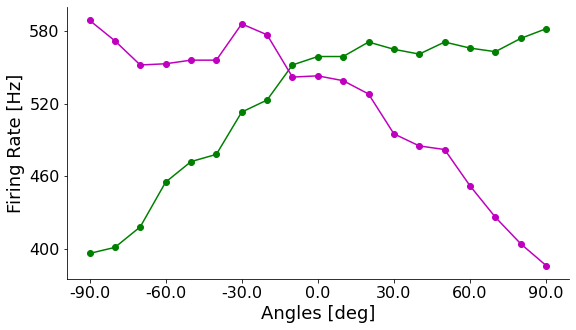

In [115]:
path_r = '/home/ubuntu/cosyne-tutorial-2022/DATA/data_ILDs_old/r_s_100_1000'
path_l = '/home/ubuntu/cosyne-tutorial-2022/DATA/data_ILDs_old/l_s_100_1000'

text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=16)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels 
plt.rc('legend', fontsize=16)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title
fig, axs = plt.subplots(1, figsize=(9,5), sharey=True)

max_x = 90
axs.set_xlabel("Angles [deg]", fontsize = 18)
axs.set_ylabel("Firing Rate [Hz]", fontsize = 18)
x = angles2
axs.set_ylim([375,600])
for i in range(len(x)):
    axs.axvline(x[i], linewidth = 0.2, color = 'w')
y1 = np.loadtxt(path_r,  delimiter=',')
axs.plot(x,y1,"o-g", label = 'Right LSO')
y = np.loadtxt(path_l,  delimiter=',')
axs.plot(x,y,"o-m", label = 'Left LSO')
axs.set_yticks(ticks = np.arange(400,625,60))
axs.set_yticklabels(np.arange(400,625,60), fontsize = 16)
axs.set_xticks(ticks = x[::3])
axs.set_xticklabels(x[::3], fontsize = 16)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
#axs.legend(fontsize = 18)

#axs.spines['bottom'].set_color('white')
#axs.spines['left'].set_color('white')
#axs.xaxis.label.set_color('white')
#axs.tick_params(axis='x', colors='white')
#axs.yaxis.label.set_color('white')
#axs.tick_params(axis='y', colors='white')
#plt.savefig('demo.png', transparent=True)

In [116]:
ex_angle = -60
r_LSO_rate = y1[np.where(angles2 == ex_angle)[0][0]]
print("r_LSO_spikes:",r_LSO_rate)
l_LSO_rate = y[np.where(angles2 == ex_angle)[0][0]]
print("l_LSO_spikes:",l_LSO_rate)

if(r_LSO_rate>=l_LSO_rate):
    dx = 1
else:
    dx = 0
where = ["left", "right"]
print("interpolation at {}".format(where[dx]))

r_LSO_spikes: 455.0
l_LSO_spikes: 553.0
interpolation at left


In [117]:
def func1(x, a, b, c):
    return(-b/(2*a)*(x**2) + b * x + c)

def inv_func1(y, a, b, c):
    x1 = a + (-a*(math.sqrt(abs(b**2 + 2*b*(c-y)/a))/b))
    x2 = a - (-a*(math.sqrt(abs(b**2 + 2*b*(c-y)/a))/b))
    #print(x1, x2)
    if(a>=0):
        return(x1)
    else:
        return(x2)

-58.71179856612626
-20.559937917445453


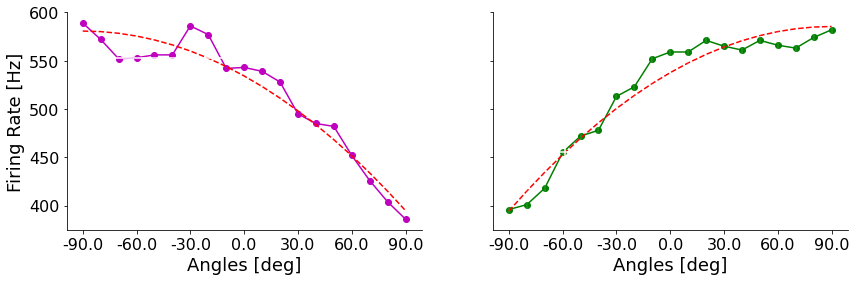

In [118]:
max_x = 90
fig, axs = plt.subplots(1,2, figsize=(14,4), sharey=True)

axs[0].set_ylabel("Firing Rate [Hz]", fontsize = 18)
x = angles2
y = np.loadtxt(path_r,  delimiter=',')
popt, pcov = curve_fit(func1, x, y, bounds=([max_x, -np.inf, -np.inf], np.inf))
a, b, c, = popt
#print(popt)
axs[1].plot(x,y,"o-g")
axs[1].plot(x, func1(x, *popt), 'r--', label='fit')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
for i in range(len(x)):
    axs[0].axvline(x[i], linewidth = 0.2, color ='w')
corr_matrix = np.corrcoef(y, func1(x, *popt))
corr = corr_matrix[0,1]
R_sq[0] = corr**2
#print("r2 right", R_sq)
#axs[0].grid()
#Prediction
if(r_LSO_rate>np.max(func1(x, *popt))):
    r_LSO_rate = np.max(func1(x, *popt))
if(r_LSO_rate<np.min(func1(x, *popt))):
    r_LSO_rate = np.min(func1(x, *popt))
pred = inv_func1(r_LSO_rate, a, b, c)
print(pred)
axs[0].set_ylim([375,600])
axs[1].axhline(y = r_LSO_rate, xmin = 0, xmax = 0.657, color = 'w')
axs[1].axvline(x = pred, ymin = 0, ymax = 0.84,color = 'w')
axs[0].set_xlabel("Angles [deg]", fontsize = 18)
axs[0].set_xticks(x[::3])
axs[0].set_xticklabels(x[::3], fontsize = 16)
axs[0].set_yticks(ticks = np.arange(400,650,50))
axs[0].set_yticklabels(np.arange(400,650,50), fontsize = 16)

min_x = -90
y = np.loadtxt(path_l,  delimiter=',')
popt, pcov = curve_fit(func1, x, y, bounds=(-np.inf, [min_x, np.inf, np.inf]))
a, b, c, = popt
axs[0].plot(x,y,"o-m")
axs[0].plot(x, func1(x, *popt), 'r--', label='fit')
for i in range(len(x)):
    axs[1].axvline(x[i], linewidth = 0.2, color = 'w')
corr_matrix = np.corrcoef(y, func1(x, *popt))
corr = corr_matrix[0,1]
R_sq[1] = corr**2
#print(popt)
#print("r2 left", R_sq)
#axs[1].grid()
#Prediction
if(l_LSO_rate>np.max(func1(x, *popt))):
    l_LSO_rate = np.max(func1(x, *popt))
if(l_LSO_rate<np.min(func1(x, *popt))):
    l_LSO_rate = np.min(func1(x, *popt))
pred = inv_func1(l_LSO_rate, a, b, c)
print(pred)
axs[0].axhline(y = l_LSO_rate,xmin = 0, xmax = 0.8, color = 'w')
axs[0].axvline(pred, ymin = 0, ymax =  0.355, color = 'w')
axs[1].set_xlabel("Angles [deg]", fontsize = 18)
axs[1].set_xticks(x[::3])
axs[1].set_xticklabels(x[::3], fontsize = 16)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

In [119]:
itds = np.arange(-1,1.05,0.05)
n_battery = 10
r_rate_group4 = np.zeros([n_battery, len(itds)])
l_rate_group4 = np.zeros([n_battery, len(itds)])

for n in range(len(itds)):
    r_rate_group4[:,n] = np.loadtxt('DATA/data_ITDs_100_Hz_old/rate_group4_itd_{}'.format(round(itds[n],2)), delimiter=',')
    l_rate_group4[:,n] = np.loadtxt('DATA/data_ITDs_100_Hz_old/left_rate_group4_itd_{}'.format(round(itds[n],2)), delimiter=',')


In [120]:
w_head = 22 #cm
v_sound = 33000 #cm/s
delta_x = (w_head*np.sin(np.deg2rad(90))) #cm
lim = 1000000*delta_x/v_sound #us
x_range = np.arange(-lim, lim + lim/1000, lim/1000)
x_range
#axs[0].fill_between(x_range, np.max(y)+5, color = 'lightgrey')

array([-666.66666667, -666.        , -665.33333333, ...,  665.33333333,
        666.        ,  666.66666667])

In [121]:
lim

666.6666666666666

In [122]:
def inv_func2(y, a, b, c, dx):
    x1 = (-b + (math.sqrt(abs(b**2 - 4*a*(c-y)))))/(2*a)
    x2 = (-b - (math.sqrt(abs(b**2 - 4*a*(c-y)))))/(2*a)
    #print(x1, x2)
    if(dx):
        return(x2)
    else:
        return(x1)

In [123]:
r_MSO_rate =[ 56.        , 37.31989516, 21.        ,  9.        ,  3.40925103,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ]
l_MSO_rate = [63.        , 24.35916528, 13.47864864,  6.66508345,  3.57876889,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ]
dx = 1

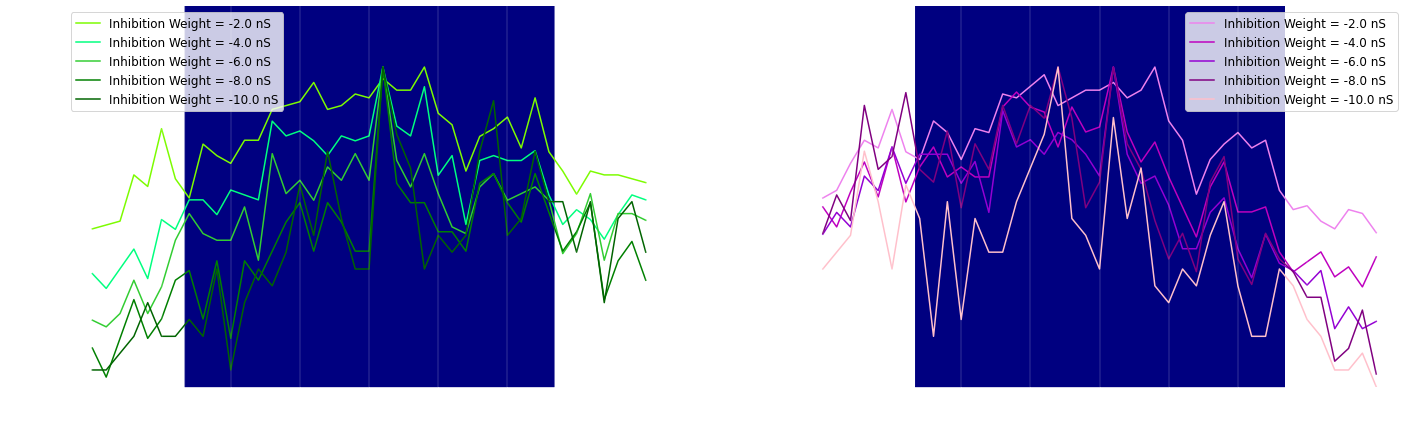

In [15]:
text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=16)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels 
plt.rc('legend', fontsize=12)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title
colorsr = ['lawngreen', 'springgreen', 'limegreen', 'green', 'darkgreen']
colorsl = ['violet', 'm', 'darkviolet', 'purple', 'pink']
fig, axs = plt.subplots(1,2, figsize = (24,7), sharey = True)


itds = np.arange(-1,1.05,0.05)
MNTBCs2MSO_weights = [-2.0, -4.0, -6.0, -8.0, -10.0, -12.0, -14.0, -16.0, -20.0, -24.0]
n_battery = len(MNTBCs2MSO_weights)

l_rate_group4 = np.zeros([n_battery, len(itds)])
rate_group4 = np.zeros([n_battery, len(itds)])

for n in range(len(itds)):
    l_rate_group4[:,n] = np.loadtxt('DATA/data_ITDs_100_Hz_old/left_rate_group4_itd_{}'.format(round(itds[n],2)), delimiter=',')
    rate_group4[:,n] = np.loadtxt('DATA/data_ITDs_100_Hz_old/rate_group4_itd_{}'.format(round(itds[n],2)), delimiter=',')

l_rate_group4_norm = np.zeros([n_battery, len(itds)])
rate_group4_norm = np.zeros([n_battery, len(itds)])

for i in range(n_battery-5):
    l_rate_group4_norm[i][:] = l_rate_group4[i][:]/np.max(l_rate_group4[i][:])
    rate_group4_norm[i][:] = rate_group4[i][:]/np.max(rate_group4[i][:])

for i in range(n_battery-5):
    axs[0].plot(itds*1000, rate_group4_norm[i][:], color = colorsr[i], label = "Inhibition Weight = {} nS".format(MNTBCs2MSO_weights[i]))
    axs[0].set_ylabel('Normalized Firing Rate [Hz]')
    axs[0].set_xlabel("ITDs [\u03BCs]")
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    
    axs[1].plot(itds*1000, l_rate_group4_norm[i][:], color = colorsl[i], label = "Inhibition Weight = {} nS".format(MNTBCs2MSO_weights[i]))
    #axs[1].set_ylabel('Normalized Firing Rate [Hz]')
    axs[1].set_xlabel("ITDs [\u03BCs]")
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)

for j in np.arange(-1000,1250,250):
    axs[0].axvline(x = j, linewidth = 0.2, color = 'w')
    axs[1].axvline(x = j, linewidth = 0.2, color = 'w')
    
w_head = 22 #cm
v_sound = 33000 #cm/s
delta_x = (w_head*np.sin(np.deg2rad(90))) #cm
lim = 1000000*delta_x/v_sound #us
x_range = np.arange(-lim, lim + lim/1000, lim/1000)
axs[0].set_ylim([0,1.19])
axs[1].set_ylim([0,1.19])
axs[0].fill_between(x_range, 0,1.2, color = 'navy')
axs[1].fill_between(x_range, 0,1.2, color = 'navy')
axs[0].legend()
axs[1].legend()

axs[0].spines['bottom'].set_color('white')
axs[0].spines['left'].set_color('white')
axs[0].xaxis.label.set_color('white')
axs[0].tick_params(axis='x', colors='white')
axs[0].yaxis.label.set_color('white')
axs[0].tick_params(axis='y', colors='white')
axs[1].spines['bottom'].set_color('white')
axs[1].spines['left'].set_color('white')
axs[1].xaxis.label.set_color('white')
axs[1].tick_params(axis='x', colors='white')
axs[1].yaxis.label.set_color('white')
axs[1].tick_params(axis='y', colors='white')
plt.savefig('demo.png', transparent=True)

pred_before 530.992485523295
pred 530.992485523295
r_pred_deg 52.79609676517613
left_pred_before 476.7793905386744
left_pred 476.7793905386744
left_pred_deg 45.65705807007662


Text(0.5, 0, 'ITDs [μs]')

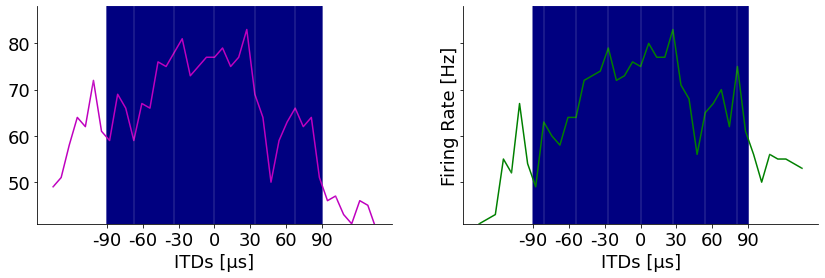

In [129]:
dx = 1
i = 0 #neuron 0

text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=16)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels 
plt.rc('legend', fontsize=16)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title
fig, axs = plt.subplots(1,2, figsize=(14,4), sharey=True)
x = itds*1000 #us
y = r_rate_group4[i,:]
axs[1].plot(x, y, color = 'g')
coeff = np.polyfit(x, y, 2)
y_range = coeff[0]*x_range**2 + coeff[1]*x_range + coeff[2]

if(r_MSO_rate[i] == 0):
    #Prediction
    pred_r = np.nan
    print("r_pred_deg", pred_r)
else:
    if(r_MSO_rate[i]>np.max(y_range)):
        r_MSO_rate[i]=np.max(y_range)
    if(r_MSO_rate[i]<np.min(y_range)):
        r_MSO_rate[i]=np.min(y_range)
    #Prediction
    pred = inv_func2(r_MSO_rate[i], coeff[0], coeff[1], coeff[2], dx)
    print("pred_before", pred)
    if(pred>=np.max(x_range)):
        pred=np.max(x_range)
    if(pred<np.min(x_range)):
        pred=np.min(x_range)
    print("pred", pred)
    pred_r = np.rad2deg(np.arcsin((v_sound*pred)/(1000000*w_head)))
    print("r_pred_deg", pred_r)
    
for k in range(len(x)):
    if(k%4 == 0):
        axs[1].axvline(x[k], linewidth = 0.2, color = 'w')
    
#axs[1].plot(x, coeff[0]*x**2 + coeff[1]*x + coeff[2], 'r--')
#axs[0].grid()
axs[1].set_ylim(np.min(y), np.max(y)+5)
axs[1].set_ylabel("Firing Rate [Hz]")
axs[0].set_xlabel("Angles [deg]")
axs[1].set_xlabel("Angles [deg]")

axs[0].set_xticks(np.linspace(-lim, +lim, 7))
axs[0].set_xticklabels([-90, -60, -30, 0, 30, 60, 90])

axs[1].set_xticks(np.linspace(-lim, +lim, 7))
axs[1].set_xticklabels([-90, -60, -30, 0, 30, 60, 90])


axs[1].fill_between(x_range, np.max(y)+5, color = 'navy')
#axs[1].axhline(y = r_MSO_rate[i],xmin = 0, xmax = 0.82, color = 'w') 
#axs[1].axvline(x = pred, ymin = 0, ymax = 0.455,color = 'w') 
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

y = l_rate_group4[i,:]
axs[0].plot(x, y, color = 'm')
coeff = np.polyfit(x, y, 2)
y_range = coeff[0]*x_range**2 + coeff[1]*x_range + coeff[2]
if(l_MSO_rate[i]>np.max(y_range)):
    l_MSO_rate[i] = np.max(y_range)
if(l_MSO_rate[i]<np.min(y_range)):
    l_MSO_rate[i] = np.min(y_range)
#axs[0].plot(x, coeff[0]*x**2 + coeff[1]*x + coeff[2], 'r--')
axs[0].fill_between(x_range, np.max(y)+5, color = 'navy')

pred = inv_func2(l_MSO_rate[i], coeff[0], coeff[1], coeff[2], dx)
#axs[1].grid()
print("left_pred_before", pred)
if(pred>=np.max(x_range)):
    pred=np.max(x_range)
if(pred<np.min(x_range)):
    pred=np.min(x_range)
print("left_pred", pred)
print("left_pred_deg", np.rad2deg(np.arcsin((v_sound*pred)/(1000000*w_head))))
#axs[0].axhline(y = l_MSO_rate[i], xmin = 0, xmax = 0.73, color = 'w') 
#axs[0].axvline(x = pred, ymin = 0, ymax = 0.45,color = 'w') 
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
for k in range(len(x)):
    if(k%5 == 0):
        axs[0].axvline(x[k], linewidth = 0.2, color = 'w')

""""axs[0].spines['bottom'].set_color('white')
axs[0].spines['left'].set_color('white')
axs[0].xaxis.label.set_color('white')
axs[0].tick_params(axis='x', colors='white')
axs[0].yaxis.label.set_color('white')
axs[0].tick_params(axis='y', colors='white')
axs[1].spines['bottom'].set_color('white')
axs[1].spines['left'].set_color('white')
axs[1].xaxis.label.set_color('white')
axs[1].tick_params(axis='x', colors='white')
axs[1].yaxis.label.set_color('white')
axs[1].tick_params(axis='y', colors='white')
plt.savefig('demo.png', transparent=True)"""

axs[0].set_xlabel("ITDs [\u03BCs]")
axs[1].set_xlabel("ITDs [\u03BCs]")

pred_before 530.992485523295
pred 530.992485523295
r_pred_deg 52.79609676517613
left_pred_before 476.7793905386744
left_pred 476.7793905386744
left_pred_deg 45.65705807007662


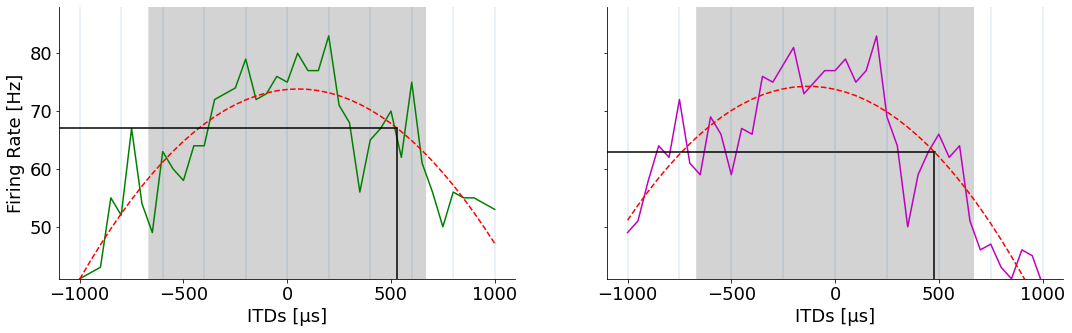

In [128]:
r_MSO_rate[0] = 67.0
l_MSO_rate[0] = 63.0
dx = 1
i = 0 #neuron 0
text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=16)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels 
plt.rc('legend', fontsize=16)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title
fig, axs = plt.subplots(1,2, figsize=(18,5), sharey=True)
x = itds*1000 #us
y = r_rate_group4[i,:]
axs[0].plot(x, y, color = 'g')
coeff = np.polyfit(x, y, 2)
y_range = coeff[0]*x_range**2 + coeff[1]*x_range + coeff[2]

if(r_MSO_rate[i] == 0):
    #Prediction
    pred_r = np.nan
    print("r_pred_deg", pred_r)
else:
    if(r_MSO_rate[i]>np.max(y_range)):
        r_MSO_rate[i]=np.max(y_range)
    if(r_MSO_rate[i]<np.min(y_range)):
        r_MSO_rate[i]=np.min(y_range)
    #Prediction
    pred = inv_func2(r_MSO_rate[i], coeff[0], coeff[1], coeff[2], dx)
    print("pred_before", pred)
    if(pred>=np.max(x_range)):
        pred=np.max(x_range)
    if(pred<np.min(x_range)):
        pred=np.min(x_range)
    print("pred", pred)
    pred_r = np.rad2deg(np.arcsin((v_sound*pred)/(1000000*w_head)))
    print("r_pred_deg", pred_r)
    
for k in range(len(x)):
    if(k%4 == 0):
        axs[0].axvline(x[k], linewidth = 0.2)
    
axs[0].plot(x, coeff[0]*x**2 + coeff[1]*x + coeff[2], 'r--')
#axs[0].grid()
axs[0].set_ylim(np.min(y), np.max(y)+5)
axs[0].set_ylabel("Firing Rate [Hz]")
axs[0].set_xlabel("ITDs [\u03BCs]")
axs[1].set_xlabel("ITDs [\u03BCs]")
axs[0].fill_between(x_range, np.max(y)+5, color = 'lightgrey')
axs[0].axhline(y = r_MSO_rate[i],xmin = 0, xmax = 0.738, color = 'k') 
axs[0].axvline(x = pred, ymin = 0, ymax = 0.555,color = 'k') 
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

y = l_rate_group4[i,:]
axs[1].plot(x, y, color = 'm')
coeff = np.polyfit(x, y, 2)
y_range = coeff[0]*x_range**2 + coeff[1]*x_range + coeff[2]
if(l_MSO_rate[i]>np.max(y_range)):
    l_MSO_rate[i] = np.max(y_range)
if(l_MSO_rate[i]<np.min(y_range)):
    l_MSO_rate[i] = np.min(y_range)
axs[1].plot(x, coeff[0]*x**2 + coeff[1]*x + coeff[2], 'r--')
axs[1].fill_between(x_range, np.max(y)+5, color = 'lightgrey')
axs[1].axhline(y = l_MSO_rate[i], xmin = 0, xmax = 0.718, color = 'k') 
pred = inv_func2(l_MSO_rate[i], coeff[0], coeff[1], coeff[2], dx)
#axs[1].grid()
print("left_pred_before", pred)
if(pred>=np.max(x_range)):
    pred=np.max(x_range)
if(pred<np.min(x_range)):
    pred=np.min(x_range)
print("left_pred", pred)
print("left_pred_deg", np.rad2deg(np.arcsin((v_sound*pred)/(1000000*w_head))))
axs[1].axvline(x = pred, ymin = 0, ymax = 0.465,color = 'k') 
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
for k in range(len(x)):
    if(k%5 == 0):
        axs[1].axvline(x[k], linewidth = 0.2)